
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [5]:
X_train[8].shape

(28, 28)

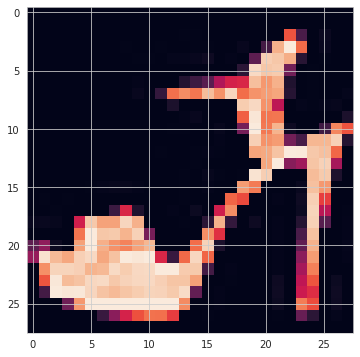

In [6]:
plt.imshow(X_train[9])

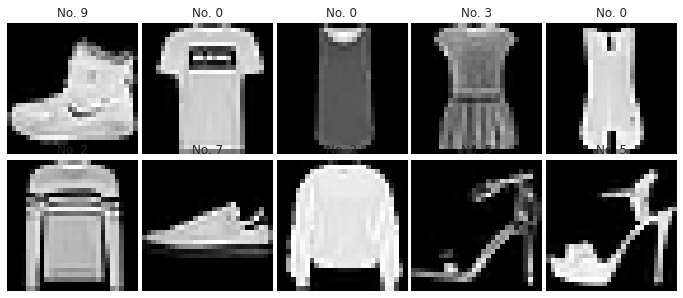

In [7]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

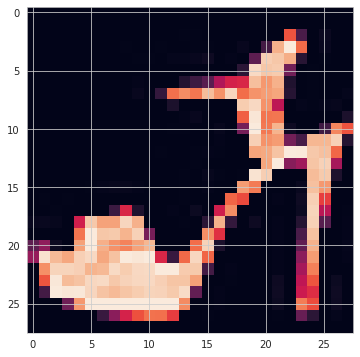

In [9]:
plt.imshow(X_train[9])

**Reshape the X into 4 dimension**

In [10]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)


**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2022-03-15 19:36:08.537751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 19:36:08.641967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 19:36:08.642700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 19:36:08.644216: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2560128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,561,738
Trainable params: 2,561,738
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

2022-03-15 19:36:11.359758: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-15 19:36:12.628960: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1875/1875 [==============================] - 13s 3ms/step - loss: 0.3672 - accuracy: 0.8721 - val_loss: 0.2993 - val_accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9113 - val_loss: 0.2714 - val_accuracy: 0.9046
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2110 - accuracy: 0.9264 - val_loss: 0.3194 - val_accuracy: 0.8928
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1867 - accuracy: 0.9343 - val_loss: 0.2940 - val_accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1662 - accuracy: 0.9419 - val_loss: 0.2810 - val_accuracy: 0.9116
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1509 - accuracy: 0.9476 - val_loss: 0.3178 - val_accuracy: 0.9126
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1374 - accuracy: 0.9527 - val_loss: 0.3277 - val_accuracy: 0.9099
Ep

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.history.history

{'loss': [0.36716562509536743,
  0.24853743612766266,
  0.21097619831562042,
  0.1867106705904007,
  0.16617172956466675,
  0.15087127685546875,
  0.1373997926712036,
  0.12541894614696503,
  0.1142527163028717,
  0.10475512593984604],
 'accuracy': [0.8720999956130981,
  0.9112833142280579,
  0.9264000058174133,
  0.9342666864395142,
  0.9418500065803528,
  0.947616696357727,
  0.9527166485786438,
  0.9573000073432922,
  0.9611333608627319,
  0.9637666940689087],
 'val_loss': [0.29931366443634033,
  0.27137842774391174,
  0.3193953037261963,
  0.29398074746131897,
  0.2810218632221222,
  0.31780362129211426,
  0.32774630188941956,
  0.34401172399520874,
  0.37955352663993835,
  0.40236136317253113],
 'val_accuracy': [0.8934000134468079,
  0.9046000242233276,
  0.892799973487854,
  0.9081000089645386,
  0.9115999937057495,
  0.9125999808311462,
  0.9099000096321106,
  0.9067000150680542,
  0.9070000052452087,
  0.9078999757766724]}

In [21]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.367,0.872,0.299,0.893
1,0.249,0.911,0.271,0.905
2,0.211,0.926,0.319,0.893
3,0.187,0.934,0.294,0.908
4,0.166,0.942,0.281,0.912


**Plot values of metrics you used in your model.**

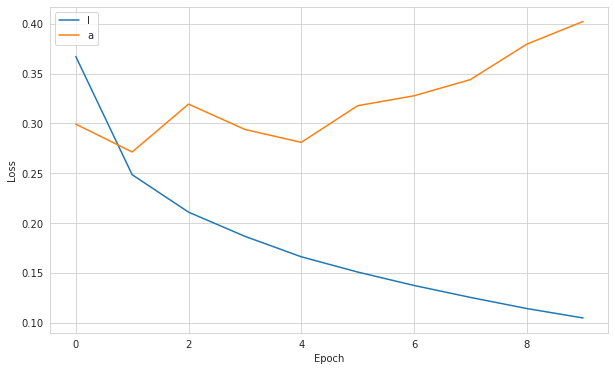

In [22]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

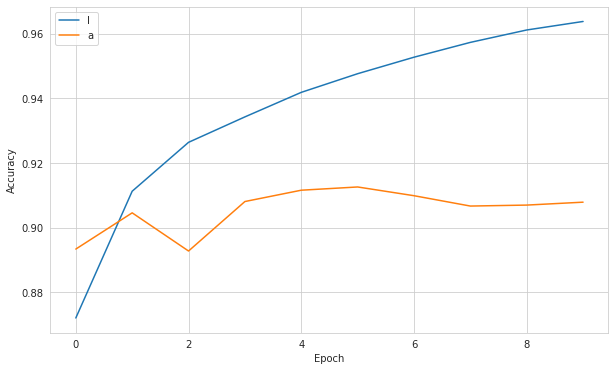

In [23]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

**Train the model using earlystop.**

In [24]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.9674 - val_loss: 0.3793 - val_accuracy: 0.9108
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9700 - val_loss: 0.4149 - val_accuracy: 0.9106
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0828 - accuracy: 0.9721 - val_loss: 0.4422 - val_accuracy: 0.9112


**Plot values of metrics you used in your model.**

In [26]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.097,0.967,0.379,0.911
1,0.089,0.970,0.415,0.911
2,0.083,0.972,0.442,0.911


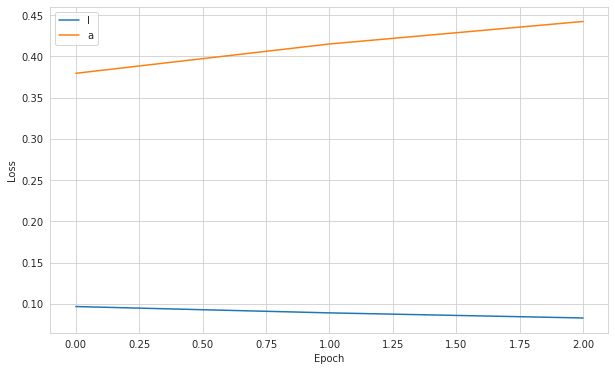

In [27]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

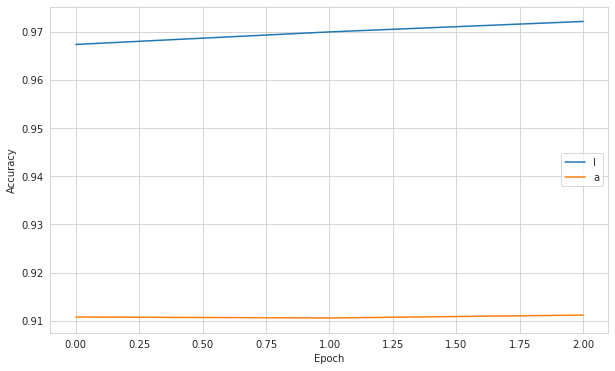

In [28]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [29]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.9112
[0.4421629309654236, 0.9111999869346619]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
preds = model.predict(X_test)
preds

array([[1.2305869e-13, 4.3253873e-15, 1.7838833e-10, ..., 2.7744727e-07,
        4.9095363e-09, 9.9999750e-01],
       [7.0423965e-18, 0.0000000e+00, 1.0000000e+00, ..., 1.7221933e-29,
        1.2946902e-35, 0.0000000e+00],
       [5.7566580e-18, 1.0000000e+00, 1.9624169e-27, ..., 1.6480145e-18,
        3.1716997e-20, 6.2332134e-21],
       ...,
       [9.0380093e-15, 0.0000000e+00, 1.2982753e-21, ..., 2.9336149e-25,
        1.0000000e+00, 0.0000000e+00],
       [1.6837005e-19, 1.0000000e+00, 9.7188440e-23, ..., 8.8214933e-18,
        3.6938170e-21, 3.3189762e-17],
       [1.4589819e-03, 1.4016309e-04, 4.8893853e-03, ..., 3.5083253e-02,
        6.0878987e-03, 7.7247474e-04]], dtype=float32)

In [32]:
preds[0]

array([1.2305869e-13, 4.3253873e-15, 1.7838833e-10, 7.3266596e-18,
       2.7708337e-13, 2.2540144e-06, 9.1194908e-12, 2.7744727e-07,
       4.9095363e-09, 9.9999750e-01], dtype=float32)

In [33]:
predictions= np.argmax(preds, axis=1)

In [34]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.89      0.86      1000
           3       0.92      0.90      0.91      1000
           4       0.88      0.84      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [36]:
print(confusion_matrix(y_test, predictions))

[[866   1  20  12   7   1  88   0   5   0]
 [  3 984   1   6   1   0   1   0   4   0]
 [ 21   1 885   6  38   0  49   0   0   0]
 [ 26   6  14 904  20   0  27   0   3   0]
 [  4   1  72  28 841   0  51   0   3   0]
 [  0   0   0   1   0 972   1  12   3  11]
 [125   0  64  19  48   0 733   0  11   0]
 [  0   0   0   0   0   6   0 980   0  14]
 [  2   1   3   4   0   1   3   0 985   1]
 [  1   0   0   0   0   5   0  32   0 962]]


In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4421629309654236
Test accuracy: 0.9111999869346619


# Prediction

In [38]:
my_prediction = X_test[5]

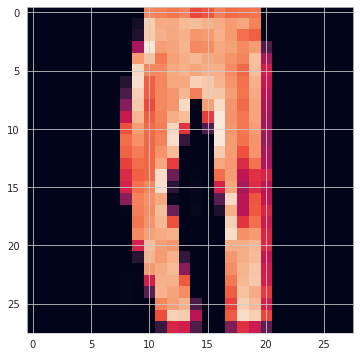

In [39]:
plt.imshow(my_prediction.reshape(28,28));

In [40]:
model.predict(my_prediction.reshape(1,28,28,1))

array([[2.0489094e-12, 1.0000000e+00, 4.3810029e-19, 1.2915057e-17,
        2.3222321e-16, 3.9537003e-17, 2.4342526e-17, 1.4372601e-17,
        1.1386243e-17, 1.2796787e-22]], dtype=float32)

In [41]:
np.argmax(model.predict(my_prediction.reshape(1,28,28,1)), axis=1)

array([1])

# End of The Assignment